In [5]:
from algorithm.louvain import louvain
from algorithm.spectral_clustering import spectral_clustering, normalized_spectral_clustering
from algorithm.hierarchical_clustering import mst_cut_clustering
from utils.analyze import get_rs_from_fixed_weighted_degree, compute_clustering, validation, metrics_to_df, analyze_mixture, validation 
from utils.generation import multivariate_t_rvs, fechner_corr
from scipy import stats
import pandas as pdp
import numpy as np
import matplotlib.pyplot as plt


def plot_quality_mixture_compare(eps, metrics, algo, metric_name):
    fig, ax = plt.subplots()
    colors = ['-b', '-r', '-g', '-y', '-p', '-c', '-m']
    c=0
    for cor in metrics:
        ax.plot(eps, metrics[cor][algo][metric_name] , colors[c], label=cor)
        c+= 1
        leg = ax.legend()

    plt.ylabel(f'{metric_name} value', size=10)
    plt.xlabel('eps', size=10)
    plt.title(f'Mixture uncertainty: {algo}', size=14)


# Mixture student with df=3 to normal
Mixture distribution is given by $binomial(1,eps)$ where $eps$ is probability that distribution is normal, $1-eps$ student.
$eps$ is in $[0,1]$  
$eps = 0$ means clean student  
$eps = 1$ means clean normal  

Experiments are repeated $n$ times for each $eps$, where the final metric for specified $eps$ is a median.

Other experiment parameters:
- num_clusters $2$
- cluster size  $20$
- sample volume for correlation estimation $40$
- repeats number $n = 1000$
- $eps$ is linespace from $0 to 1$ with step $0.01$.


## Mixture with Pearson correlation 

In [ ]:
r_in = 0.8
r_out = 0.6
true_labels, result, estimated_graphs, eps= analyze_mixture(
    r_in,
    r_out,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 40,
    num_repeats=1000,
    corr_estimator=stats.pearsonr, 
    #distribution = [np.random.multivariate_normal, multivariate_t_rvs],
    **{'df':3})

100%|██████████| 4/4 [16:55<00:00, 253.96s/it]


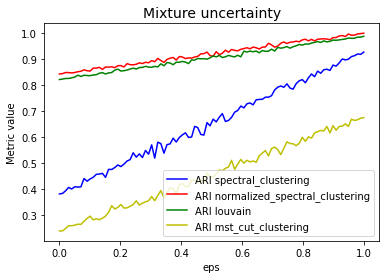

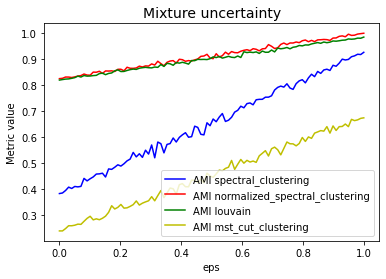

In [9]:
metrics_by_pearson, eps = validation(true_labels, result, estimated_graphs, eps)

## Mixture with Kendall correlation 

In [ ]:
r_in = 0.8
r_out = 0.6
true_labels, result, estimated_graphs, eps= analyze_mixture(
    r_in,
    r_out,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 40,
    num_repeats=1000,
    corr_estimator=stats.kendalltau, 
    #distribution = [np.random.multivariate_normal, multivariate_t_rvs],
    **{'df':3})

100%|██████████| 4/4 [11:46<00:00, 176.57s/it]


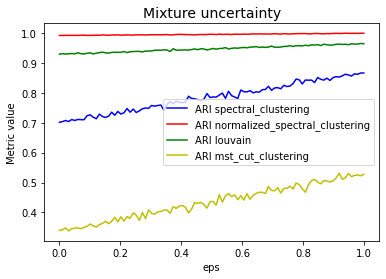

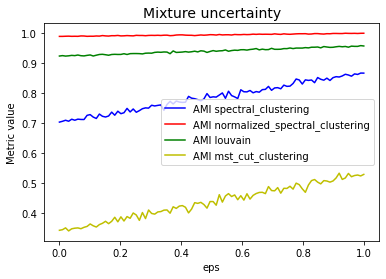

In [4]:
metrics_by_kendal, eps2 = validation(true_labels, result, estimated_graphs, eps)

## Mixture with Fechner correlation 

In [ ]:
r_in = 0.8
r_out = 0.6
true_labels, result, estimated_graphs, eps= analyze_mixture(
    r_in,
    r_out,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 40,
    num_repeats=1000,
    corr_estimator=fechner_corr, 
    #distribution = [np.random.multivariate_normal, multivariate_t_rvs],
    **{'df':3})

100%|██████████| 4/4 [08:01<00:00, 120.39s/it]


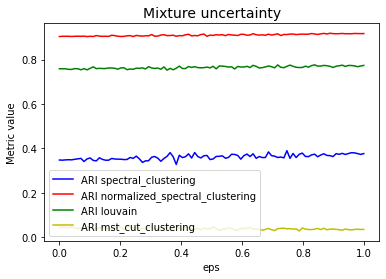

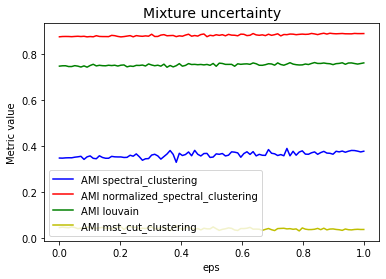

In [7]:
metrics_by_f, eps3 = validation(true_labels, result, estimated_graphs, eps)

## Detailed view per algorithm

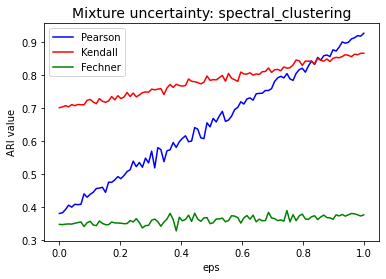

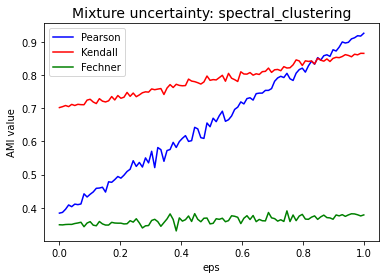

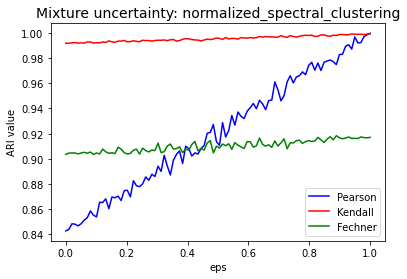

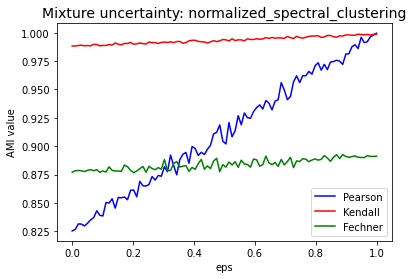

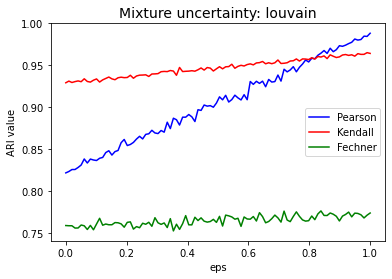

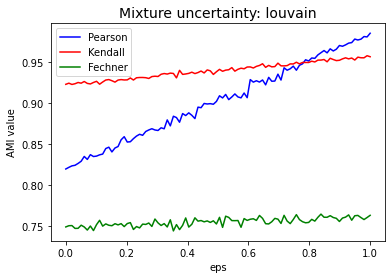

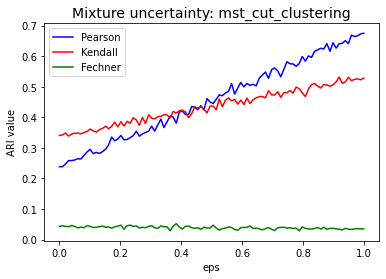

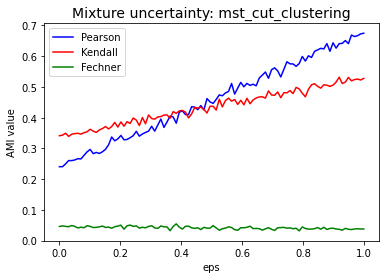

In [31]:
metrics = {'Pearson':metrics_by_pearson, 'Kendall': metrics_by_kendal, 'Fechner':metrics_by_f}
metric_names = ['ARI', 'AMI']
algos = list(metrics_by_f.keys())
metrics_cmp = {}
for algo in algos:
    for metric_name in metric_names:
        plot_quality_mixture_compare(eps, metrics, algo, metric_name)